# Waste Classification with VGG16: Code Walkthrough
This project demonstrates a deep learning pipeline for classifying recyclable and household waste using a pre-trained VGG16 model. Below is a detailed breakdown of the code.

# Libraries and Preprocessing
Imports essential libraries for data manipulation, visualization, and model training.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns



#  Dataset Download
Downloads the waste classification dataset from Kaggle using kagglehub.

The path variable stores the location of the dataset files for later use.

In [ ]:
path = kagglehub.dataset_download("alistairking/recyclable-and-household-waste-classification")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/alistairking/recyclable-and-household-waste-classification/versions/1


# Image Augmentation
Prepares data augmentation to increase dataset diversity and prevent overfitting.

Augmentations include rotation, zoom, flips, and shifts.

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest'
                            )

# Data Preparation
Sets parameters for input image size, batch size, and training epochs.

In [ ]:
input_size = (256, 256)
batch_size = 32
epochs = 25

# Train and Validation Generators

Splits the dataset into training and validation subsets (80%-20% split).

Resizes images to (256x256) and organizes them into batches.



In [ ]:
train_gen = datagen.flow_from_directory(
    path,
    target_size = input_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

Found 12000 images belonging to 1 classes.


In [ ]:
valid_gen = datagen.flow_from_directory(
    path,
    target_size = input_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 3000 images belonging to 1 classes.


# VGG16 Model Implementation
Loads a pre-trained VGG16 model (without the top classification layer).

Freezes pre-trained layers to retain their features.

Adds custom dense layers for the classification task.

Specifies the optimizer (Adam), loss function (categorical_crossentropy), and evaluation metric (accuracy).

Trains the model for the specified number of epochs, using the training and validation datasets.


In [ ]:
def create_vgg16_model(num_classes):
    # Load VGG16 with pre-trained weights, excluding top layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    return model

vgg16_model = create_vgg16_model(len(train_gen.class_indices))
vgg16_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_vgg16 = vgg16_model.fit(
    train_gen,
    epochs=epochs,
    validation_data=valid_gen
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored

375/375 ━━━━━━━━━━━━━━━━━━━━ 303s 753ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 291s 710ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 270s 710ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 352s 791ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 299s 790ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 323s 793ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 291s 710ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/25
375/375 ━━━━━━━━━━━━

# Model Evaluation
# Evaluation and Visualization

Evaluates the model using the confusion matrix and classification report.
Visualizes the confusion matrix and training/validation accuracy.

94/94 ━━━━━━━━━━━━━━━━━━━━ 50s 535ms/step

=== VGG16 Evaluation ===

Classification Report:
              precision    recall  f1-score   support

      images       1.00      1.00      1.00      3000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


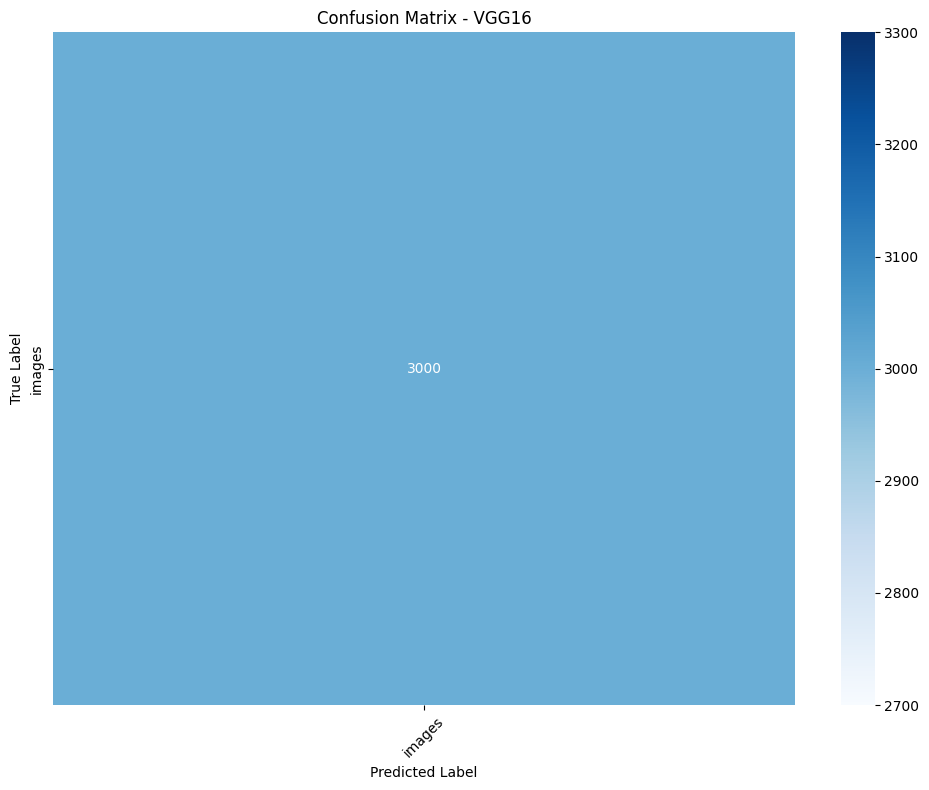

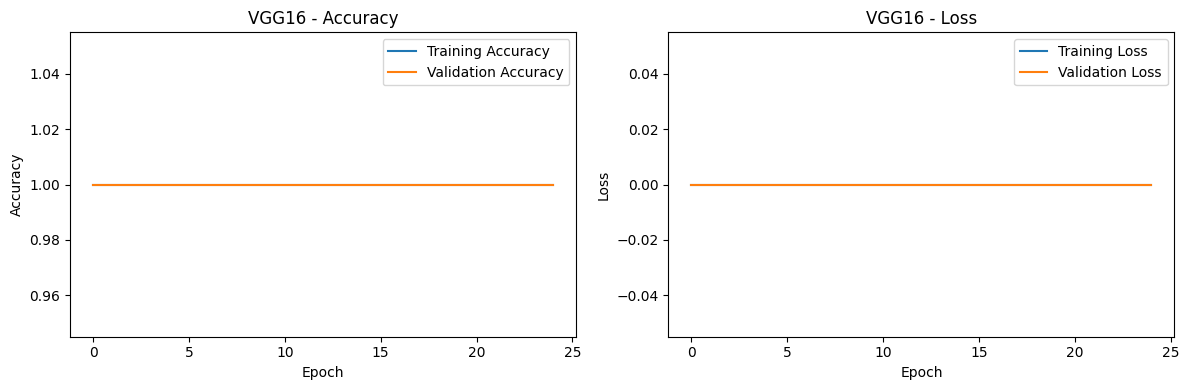

In [21]:
def evaluate_vgg16(model, valid_gen, history):
    y_pred_prob = model.predict(valid_gen)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = valid_gen.classes

    class_labels = list(valid_gen.class_indices.keys())

    cm = confusion_matrix(y_true, y_pred)

    report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)

    print("\n=== VGG16 Evaluation ===")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title('Confusion Matrix - VGG16')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('VGG16 - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('VGG16 - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


evaluate_vgg16(vgg16_model, valid_gen, history_vgg16)

# Confusion Matrix Metrics and Accuracy, Precision, F1 Score and Recall

Computes class-wise metrics for deeper insight into model performance.


In [20]:
def get_vgg16_confusion_matrix(model, valid_gen):
    y_pred_prob = model.predict(valid_gen)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = valid_gen.classes

    class_labels = list(valid_gen.class_indices.keys())

    cm = confusion_matrix(y_true, y_pred)

    print("\n=== VGG16 Confusion Matrix ===")
    print("\nConfusion Matrix (Raw Values):")
    print("\nClass Labels:", class_labels)
    print("\nMatrix:")
    print(cm)

    cm_df = pd.DataFrame(cm,
                        index=class_labels,
                        columns=class_labels)

    print("\nConfusion Matrix (DataFrame Format):")
    print(cm_df)

    print("\nPer-Class Metrics:")
    for i, label in enumerate(class_labels):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        accuracy = (TP + TN) / cm.sum()
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        print(f"\nClass: {label}")
        print(f"True Positives (TP): {TP}")
        print(f"False Positives (FP): {FP}")
        print(f"False Negatives (FN): {FN}")
        print(f"True Negatives (TN): {TN}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")

get_vgg16_confusion_matrix(vgg16_model, valid_gen)

94/94 ━━━━━━━━━━━━━━━━━━━━ 51s 546ms/step

=== VGG16 Confusion Matrix ===

Confusion Matrix (Raw Values):

Class Labels: ['images']

Matrix:
[[3000]]

Confusion Matrix (DataFrame Format):
        images
images    3000

Per-Class Metrics:

Class: images
True Positives (TP): 3000
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 0
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
